![title_pic](./img/title_page.png)
#### TV & Movie recommendation system using a collaborative and content based filtering approach

## Content Based Filtering
The content-based filtering recommendation system utilizes a cleaned dataset with 67,935 movies and TV shows, spanning 24 genres with accurate summaries. The following steps outline its creation:


- Preprocessed 'description' using techniques such as removing stopwords, employing regexTokenizer, and applying WordNetLemmatizer from the NLTK module.
- Used a custom WordNet function, curtosy of The Flatiron School,d to translate NLTK POS tags to WordNet tags.
- Visually analyzed a frequency plot across all genre targets, created in the last project I collaborated on, [github found here.](https://github.com/ParkedHampster/Twitter-Brand-Perception) , to pinpoint & remove common words among genres, thus boosting the impact of extracted features via TfidfVectorizer.
- With the improved preprocessed 'description', TfidfVectorizer from scikit-learn extracted 460 common words across genres.
- One-hot encoded 'genre' column, resulting in 24 distinct genres as features. In total, 484 features were obtained, considering genres and frequent words. Restricted features to under 500 for better efficiency, reduced overfitting, and simpler model evaluation.

In [8]:
import pandas as pd
import numpy as np
import random
import re


from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from wordcloud import WordCloud

from code.viz import word_plot

sns.set()


# increasing display to view large descriptions and reviewText
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [64]:
content_based = pd.read_csv('./data/descript_cont_based.csv')
content_based = content_based[(content_based['description'].str.len() >= 225)]
movie_df = content_based.copy()
content_based.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80233 entries, 1 to 95380
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        80233 non-null  object
 1   description  80233 non-null  object
 2   title        80233 non-null  object
 3   starring     80233 non-null  object
 4   movie_id     80233 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [63]:
counts_df = movie_df.copy()
counts_df = counts_df[(counts_df['description'].str.len() >= 225)]
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80233 entries, 1 to 95380
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        80233 non-null  object
 1   description  80233 non-null  object
 2   title        80233 non-null  object
 3   starring     80233 non-null  object
 4   movie_id     80233 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [32]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags

    Provided by Flatiron School
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [33]:
sw = stopwords.words('english')

tokenizer = RegexpTokenizer('\w+')

lemmer = WordNetLemmatizer()

regex_template = r"[^\w\s]"

In [34]:
def preprocess_and_lemmatize(text):
    text = re.sub(regex_template, '', text)
    
    text = text.lower()

    words = tokenizer.tokenize(text)

    words = [word for word in words if word not in sw]

    lemmatized_words = [lemmer.lemmatize(word, pos=get_wordnet_pos(tag))
                        for word, tag in pos_tag(words)]
    
    return ' '.join(lemmatized_words)

In [35]:
def tokenize_sw(text):
    
    words = tokenizer.tokenize(text)

    words = [word for word in words if word not in sw]
    
    return ' '.join(words)

In [65]:
content_based['description'] = content_based['description'].apply(preprocess_and_lemmatize)
content_based.head()

genre   
1  Faith & Spirituality  \
2           Documentary   
6           Documentary   
7         Kids & Family   
8  Faith & Spirituality   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              angel show dumitru california la vegas york city florida say see show sodom gomorrah day burn sin reach holy people country want save america burn dumitru say start internal revolution america start communist people start fight government government busy internal problem ocean russia cuba micaragua central america mexico two country cannot remember attack russian bombard nuclear missile silo america america burn church divorce adultery fornication sodomy a

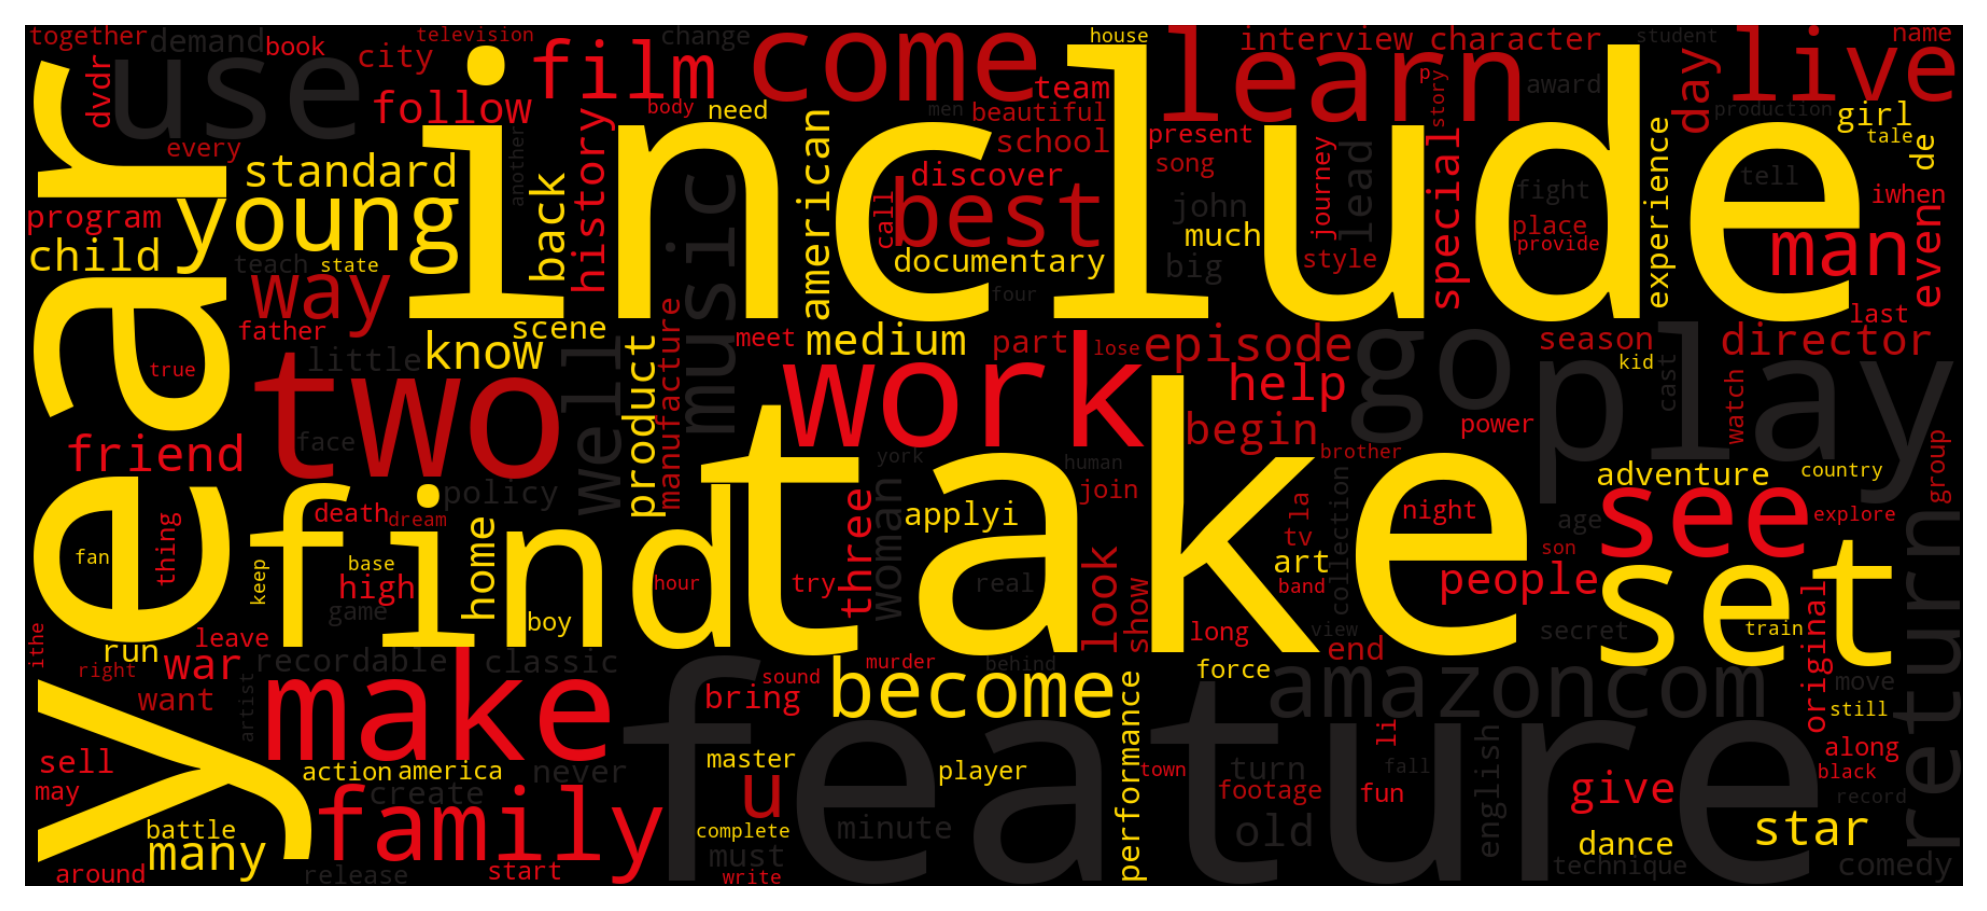

In [66]:
# This is the palette used in our associated
# presentation, available at a link later on
flix_colors = [
    "#221f1f", "#b9090b",
    "#e50914", "#ffd700"
]
canvamap = ListedColormap(flix_colors)


wordcloud = WordCloud(
    collocations=False, width=1800, height=800,
    colormap=canvamap, background_color='black'
).generate(' '.join(content_based['description']))

plt.figure(figsize=(10, 14), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

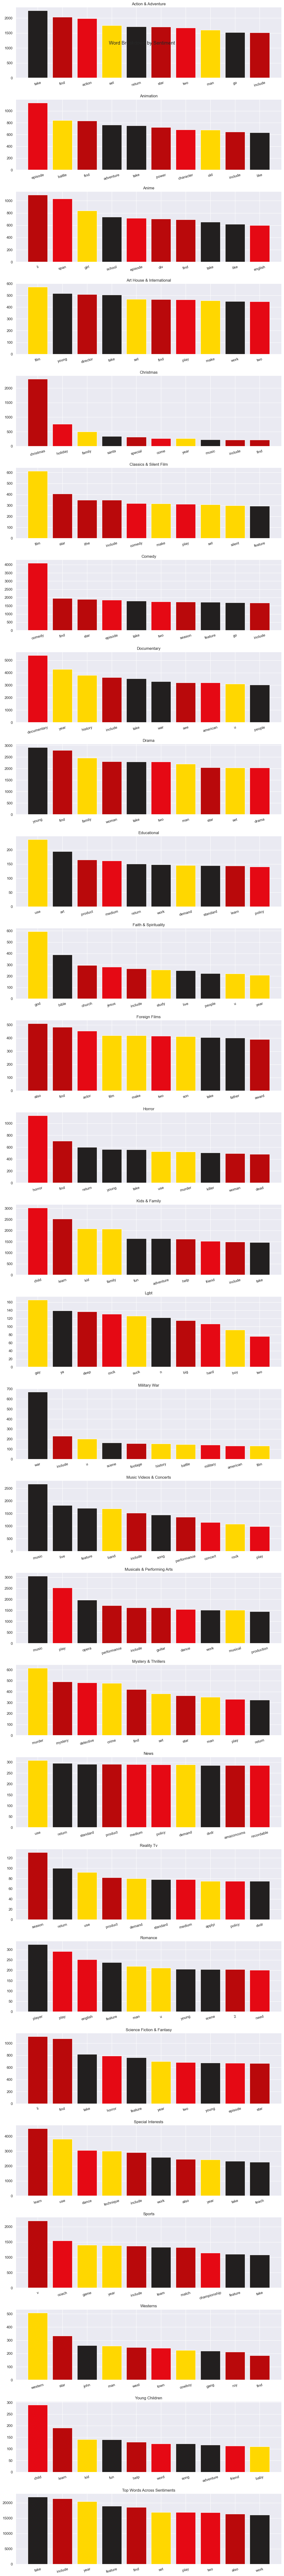

In [67]:
freq_words = word_plot(content_based, 'genre', 'description',
    n_words=10, theme=flix_colors)

In [68]:
specific_words = [
    'amazoncom', 'amazoncoms', 'dvdr', 'dvd', 'vcr','dvr',
    'vhs', 'demand', 'use', 'film', 'video', 'young', 'feature'
]

sw.extend(specific_words)

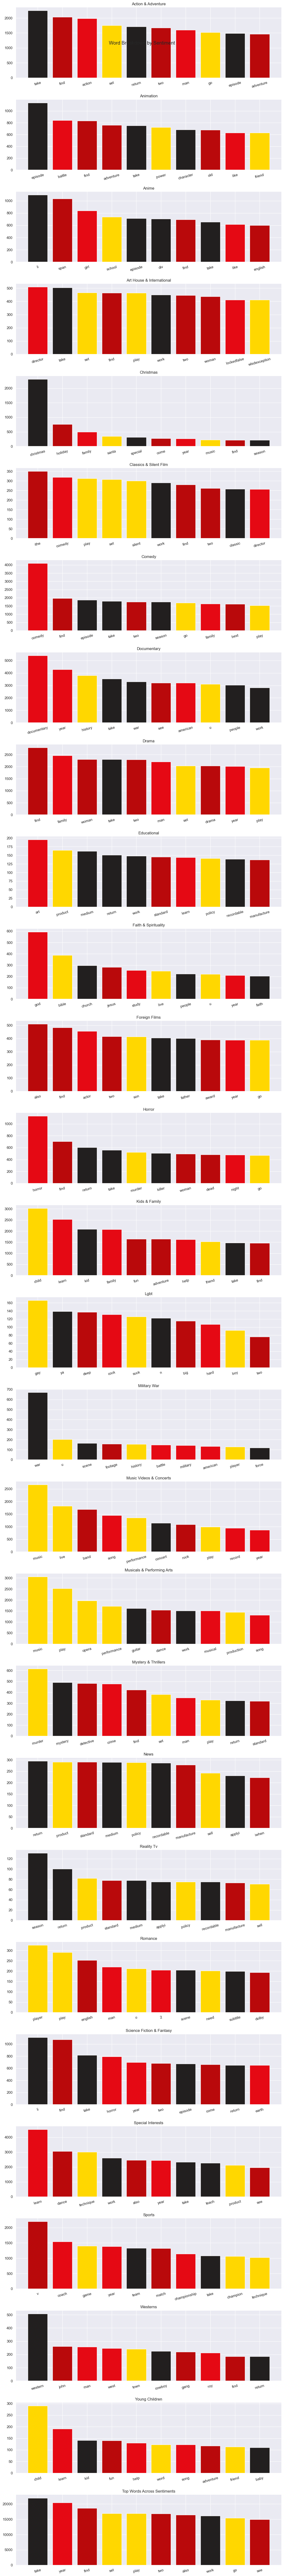

In [69]:
content_based['description'] = content_based['description'].apply(tokenize_sw)
freq_words = word_plot(content_based, 'genre', 'description',
    n_words=10, theme=flix_colors)

In [70]:
more_words = [
    'year', 'story', 'feature', 'time'
    ]
sw.extend(more_words)

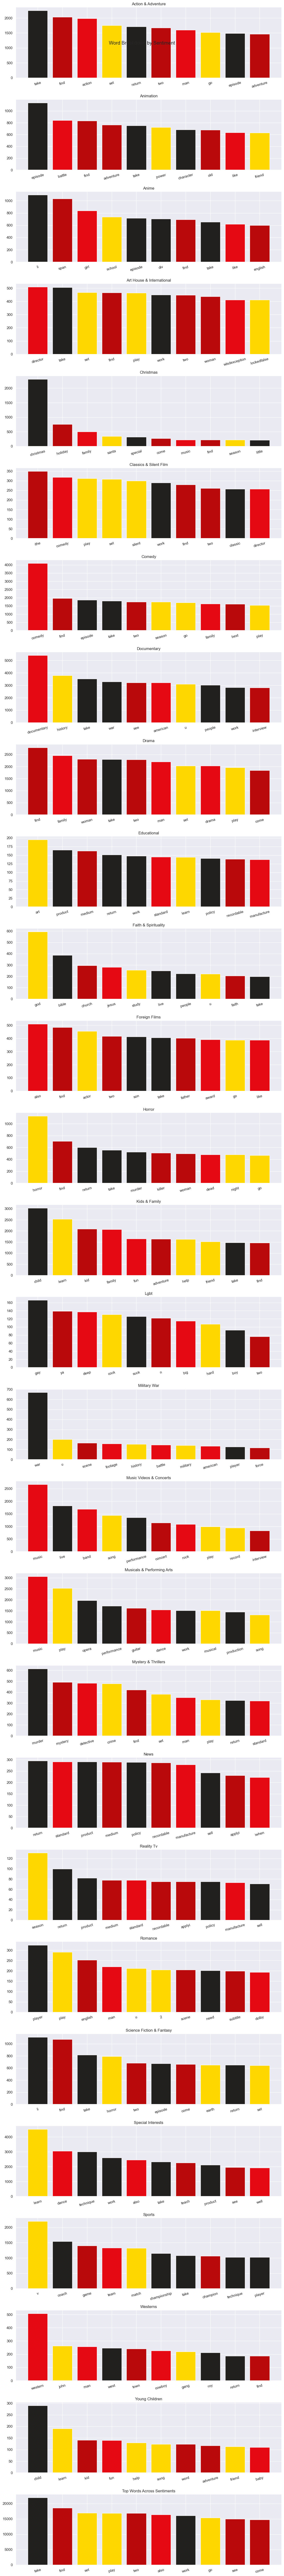

In [71]:
content_based['description'] = content_based['description'].apply(tokenize_sw)
freq_words = word_plot(content_based, 'genre', 'description',
    n_words=10, theme=flix_colors)

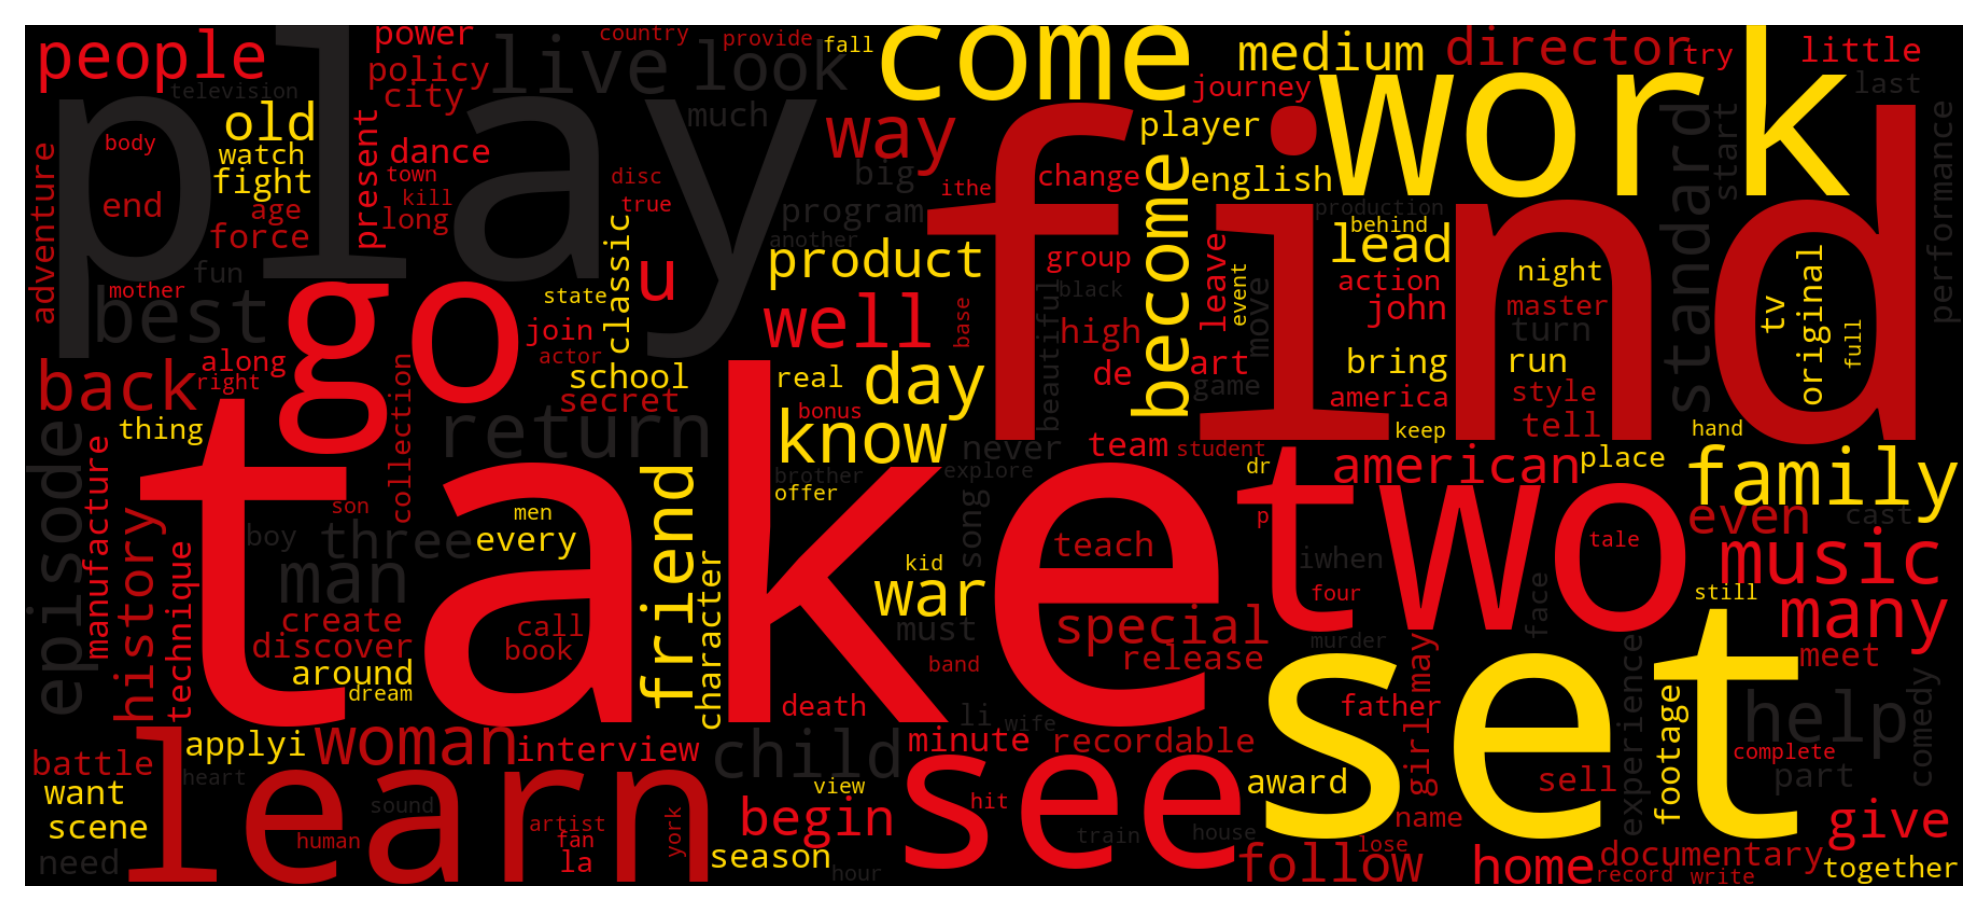

In [72]:
content_based['description'] = content_based['description'].apply(tokenize_sw)
wordcloud = WordCloud(
    collocations=False, width=1800, height=800,
    colormap=canvamap, background_color='black'
).generate(' '.join(content_based['description']))

plt.figure(figsize=(10, 14), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
last_words = [
    'set','play','take'
    ]
sw.extend(last_words)

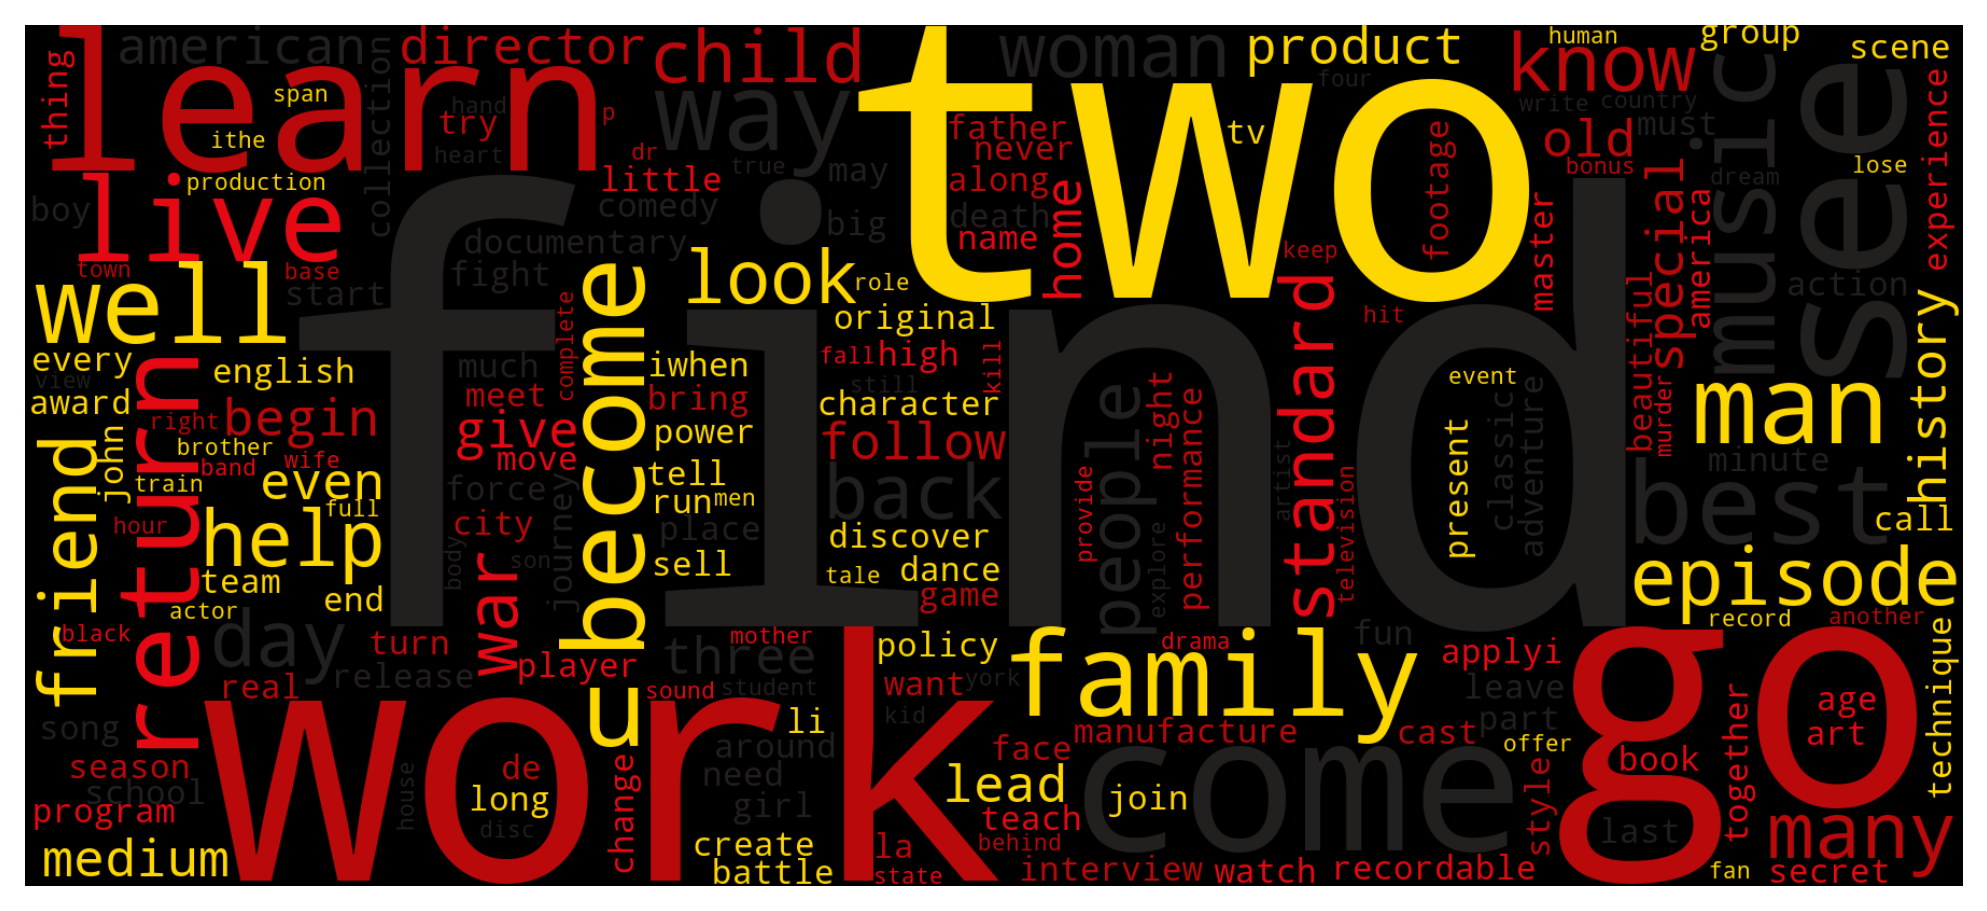

In [74]:
content_based['description'] = content_based['description'].apply(tokenize_sw)
wordcloud = WordCloud(
    collocations=False, width=1800, height=800,
    colormap=canvamap, background_color='black'
).generate(' '.join(content_based['description']))

plt.figure(figsize=(10, 14), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
content_based.to_csv('./data/nlp_descript_genre', encoding='utf-8', index=False)

In [5]:
content_based = pd.read_csv('./data/nlp_descript_genre')
content_based.dropna(subset='description',inplace=True)
movie_df=content_based.copy()
content_based.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80231 entries, 0 to 80232
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        80231 non-null  object
 1   description  80231 non-null  object
 2   title        80231 non-null  object
 3   starring     80231 non-null  object
 4   movie_id     80231 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [6]:
content_based.set_index('movie_id', inplace=True)
content_based.drop(columns=['title', 'starring'], inplace=True)
content_based = pd.get_dummies(content_based, columns=['genre'], dtype=int)

In [7]:
vectorizer = TfidfVectorizer(max_features=460)
tf_genre = vectorizer.fit_transform(content_based['description'])
tf_genre = pd.DataFrame(tf_genre.todense(), columns=vectorizer.get_feature_names_out(), index=content_based.index)

tf_genre = pd.concat([content_based.drop(['description'], axis=1), tf_genre], axis=1)
tf_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80231 entries, 0001421409 to B01HJCCLOY
Columns: 487 entries, genre_Action & Adventure to youll
dtypes: float64(460), int32(27)
memory usage: 290.4+ MB


### Similarity Algorithm Functions:

**cos_recs_genre()**: Calculates similarity scores between movies using cosine_similarity() from sklearn, leveraging TF-IDF features.

**knn_recs_genre()**: Employs NearestNeighbors model from sklearn with 'cosine' metric, conducting k-nearest neighbors search based on cosine similarity.

Both return the top 5 recommendations for a movie. The first calculates the cosine similarity matrix directly, while the second utilizes a k-nearest neighbors model.

### Performance & Evaluation:
The system performs well, suggesting new movies based on genre and word vector similarities. However, it leans towards movies of the same genre, working well for specific genres like 'Faith & Spirituality', but offering dissimilar recommendations for broader genres like 'Science Fiction & Fantasy'.

In [21]:
def cos_recs_genre(movie_id):
    input_movie_info = movie_df.loc[movie_df.movie_id == movie_id, ['title', 'genre', 'starring']]
    
    cosine_matrix = cosine_similarity(tf_genre)
    
    similarity_scores = pd.Series(cosine_matrix[tf_genre.index.get_loc(movie_id)], index=tf_genre.index)
    
    sorted_scores = similarity_scores.sort_values(ascending=False)
    
    top_recommendations = sorted_scores.loc[sorted_scores.index != movie_id].head(5)
    
    recommended_movies = movie_df.loc[movie_df.movie_id.isin(top_recommendations.index), ['title', 'genre', 'starring', 'movie_id']]
    
    print("Input movie information:")
    print(input_movie_info.to_string(index=False))
    print("\nRecommended movies:")
    return recommended_movies

In [11]:
def cos_recs_genre(vectorized_df, movie_df, movie_id=None):
    
    if movie_id is None:
        movie_id = random.choice(movie_df['movie_id'])
    
    input_movie_info = movie_df.loc[movie_df.movie_id == movie_id, ['title', 'genre', 'starring']]
    
    cosine_matrix = cosine_similarity(vectorized_df)
    
    similarity_scores = pd.Series(cosine_matrix[vectorized_df.index.get_loc(movie_id)], index=vectorized_df.index)
    
    sorted_scores = similarity_scores.sort_values(ascending=False)
    
    top_recommendations = sorted_scores.loc[sorted_scores.index != movie_id].head(5)
    
    recommended_movies = movie_df.loc[movie_df.movie_id.isin(top_recommendations.index), ['title', 'genre', 'starring', 'movie_id']]
    
    print("Input movie information:")
    print(input_movie_info.to_string(index=False))
    print("\nRecommended movies:")
    return recommended_movies

In [18]:
def knn_recs_genre(vectorized_df, movie_df, movie_id=None):
    if movie_id is None:
        movie_id = random.choice(movie_df['movie_id'])
        
    input_movie_info = movie_df.loc[movie_df.movie_id == movie_id, ['title', 'genre', 'starring']]

    features = vectorized_df

    model = NearestNeighbors(n_neighbors=6, metric='cosine')
    model.fit(features.values)

    distances, indices = model.kneighbors(features.loc[movie_id].to_numpy().reshape(1, -1), return_distance=True)

    top_recommendations = [vectorized_df.index[i] for i in indices[0][1:]]
    
    recommended_movies = movie_df.loc[movie_df.movie_id.isin(top_recommendations), ['title', 'genre', 'starring','movie_id']]

    print("Input movie information:")
    print(input_movie_info.to_string(index=False))
    print("\nRecommended movies:")
    return recommended_movies 

In [19]:
cosine_recommendations_genre = cos_recs_genre(tf_genre, movie_df)
cosine_recommendations_genre

Input movie information:
                          title genre             starring
Dragon Ball Z: Resurrection 'F' Anime Christopher R. Sabat

Recommended movies:


title   
19504                                                                                                                                                                                     Invader Zim 3 Pack  \
20458                                                                                                                                                                        Stratos 4 - Complete Collection   
22343                                                                                                                                                                            X TV Re-Mix Collector's Set   
42922  Feh&eacute;rl&oacute;fia 1982 / Hungarian cartoon / Region 2 PAL / Hungarian only version / Director: Marcell Jankovics Writers: L&aacute;szl&oacute; Gy&ouml;rgy (writer) Marcell Jankovics (writer)   
78684                                                                                                                                                                    One Piece: Season Seven, Voyage Six   

       genre              starring    movie_id  
19504  Anime       Various Artists  B000BOH9AY  
20458  Anime           Yumi Kakazu  B000CQQIAI  
22343  Anime       Various Artists  B000FFJ8S0  
42922  Anime       Various Artists  B001P82XPG  
78684  Anime  Colleen Clinkenbeard  B01ASMCHLE

In [21]:
cosine_recommendations_genre = cos_recs_genre(tf_genre, movie_df, movie_id ='B01ASMCHLE')
cosine_recommendations_genre

Input movie information:
                              title genre             starring
One Piece: Season Seven, Voyage Six Anime Colleen Clinkenbeard

Recommended movies:


title   
42922  Feh&eacute;rl&oacute;fia 1982 / Hungarian cartoon / Region 2 PAL / Hungarian only version / Director: Marcell Jankovics Writers: L&aacute;szl&oacute; Gy&ouml;rgy (writer) Marcell Jankovics (writer)  \
51115                                                                                                                                                                              Gun X Sword: The Complete   
57791                                                                                                                                                                 Hetalia: World Series 1 - Season Three   
63090                                                                                                                                                                             More Cartoons for Victory!   
66711                                                                                                                                                                        One Piece: Season 5, Voyage Two   

       genre              starring    movie_id  
42922  Anime       Various Artists  B001P82XPG  
51115  Anime         David Vincent  B0043988J4  
57791  Anime        Todd Haberkorn  B005W2BWPS  
63090  Anime             Mel Blanc  B00ADXU67Q  
66711  Anime  Colleen Clinkenbeard  B00DJ5IQ8Q

In [22]:
knn_recommendations_genre = knn_recs_genre(tf_genre, movie_df, movie_id ='B01ASMCHLE')
knn_recommendations_genre

Input movie information:
                              title genre             starring
One Piece: Season Seven, Voyage Six Anime Colleen Clinkenbeard

Recommended movies:


title   
42922  Feh&eacute;rl&oacute;fia 1982 / Hungarian cartoon / Region 2 PAL / Hungarian only version / Director: Marcell Jankovics Writers: L&aacute;szl&oacute; Gy&ouml;rgy (writer) Marcell Jankovics (writer)  \
49428                                                                                                                                                              My Bride Is a Mermaid: Season 1, Part One   
51115                                                                                                                                                                              Gun X Sword: The Complete   
51708                                                                                                                                                                         Black Butler: Season 1, Part 1   
54147                                                                                                                                                                              One Piece: Collection One   

       genre              starring    movie_id  
42922  Anime       Various Artists  B001P82XPG  
49428  Anime        Todd Haberkorn  B003H6KRMK  
51115  Anime         David Vincent  B0043988J4  
51708  Anime      J. Michael Tatum  B004AJDEBE  
54147  Anime  Colleen Clinkenbeard  B004W75BQU

In [20]:
knn_recommendations_genre = knn_recs_genre(tf_genre, movie_df)
knn_recommendations_genre

Input movie information:
                           title  genre   starring
Creating the Complete Outfielder Sports Kyla Holas

Recommended movies:


title   genre   
1194                    Tips for Tying Better Classic Atlantic Salmon  Sports  \
5945   Lenny Wilkens Legacy Basketball Clinic Series - The Basics VHS  Sports   
20497                                                    Wet Fly Ways  Sports   
27573                                       Backstroke for Every Body  Sports   
65765                        Kevin Swartwood: Shotgun Fly Sweep (DVD)  Sports   

              starring    movie_id  
1194   Various Artists  1932978933  
5945     Lenny Wilkens  B00000JNWT  
20497      Davy Wotton  B000CR7U90  
27573   Terry Laughlin  B000NA6WEA  
65765  Kevin Swartwood  B00CIBATQE